In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats # for trimmed mean
import weightedstats as ws
from statsmodels import robust
print("loading sucessful")


loading sucessful


## 1.3 Estimates of location
Essential concepts:
Mean, 
Weighted mean, 
Median, 
Weighted median, 
Trimmed mean

In [5]:
df=pd.read_csv('./data/state.csv')
df.head(10)

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA
5,Colorado,5029196,2.8,CO
6,Connecticut,3574097,2.4,CT
7,Delaware,897934,5.8,DE
8,Florida,18801310,5.8,FL
9,Georgia,9687653,5.7,GA


In [6]:
print("Mean of the Population: ",df.Population.mean())
print("\nTrimmed mean of the Population: ",stats.trim_mean(df.Population,0.1))
print("\nMedian of the Polulation: ",df.Population.median())
print("\nWeighted Mean of Murder.Rate: ",np.average(df["Murder.Rate"],weights=df['Population']))
print('\nWeighted Median of Murder.Rate :',ws.weighted_median(df["Murder.Rate"],weights=df['Population']))

Mean of the Population:  6162876.3

Trimmed mean of the Population:  4783697.125

Median of the Polulation:  4436369.5

Weighted Mean of Murder.Rate:  4.445833981123393

Weighted Median of Murder.Rate : 4.4


## 1.4 Estimate of Variability
Essential concepts:
Deviations, Variance, Standard deviation, Mean absolute deviation, Median absolute deviation from the median, range, order statistics, Percentile, Interquartile range

In [7]:
print("Variance of Polulation:", np.var(df.Population))
print("\nStandard Deviation of Population: ", df.Population.std())
print("\nInterquartile range (IQR):",np.percentile(df.Population,75)-np.percentile(df.Population,25))
print("\nMedian absolution deviation (MAD) of Population: ",stats.median_absolute_deviation(df.Population))
print("\nRange of Population: ", df.Population.max()-df.Population.min())
df_sorted=df.sort_values(by=['Population'])
df_sorted

Variance of Polulation: 45960360825926.56

Standard Deviation of Population:  6848235.347401142

Interquartile range (IQR): 4847308.0

Median absolution deviation (MAD) of Population:  3849870.3852

Range of Population:  36690330


,State,Population,Murder.Rate,Abbreviation
49,Wyoming,563626,2.7,WY
44,Vermont,625741,1.6,VT
33,North Dakota,672591,3.0,ND
1,Alaska,710231,5.6,AK
40,South Dakota,814180,2.3,SD
7,Delaware,897934,5.8,DE
25,Montana,989415,3.6,MT
38,Rhode Island,1052567,2.4,RI
28,New Hampshire,1316470,0.9,NH
18,Maine,1328361,1.6,ME


## 1.5 Estimate of Distribution
Essential concepts:
boxplot, Frequency Table, Histogram, Density Plot.

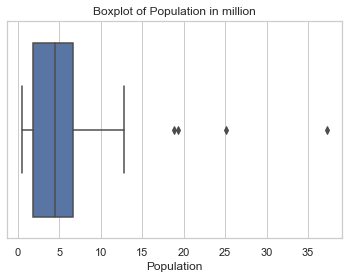

In [8]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=(df['Population'])/1000000).set_title('Boxplot of Population in million')


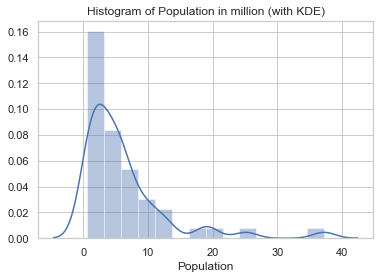

In [9]:
bx=sns.distplot((df['Population'])/1000000).set_title('Histogram of Population in million (with KDE)')
#KDE kernal Density Estimate

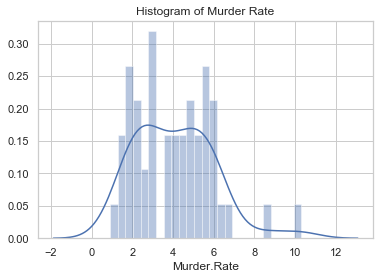

In [10]:
cx=sns.distplot(df["Murder.Rate"],bins=25).set_title("Histogram of Murder Rate")

## 1.6 Exploring Binary and Categprocal Data
Essential concepts:
Mode, Expected Value, Bar charts, Pie Charts

Text(0.5, 1.0, 'Bar Plot airline delays at DFW by cause')

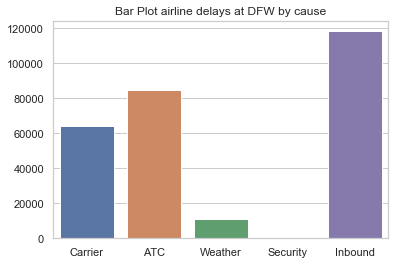

In [11]:
df2=pd.read_csv("./data/dfw_airline.csv")
df2.head(5)
sns.barplot(data=df2).set_title("Bar Plot airline delays at DFW by cause")

## 1.7 Correlation
Essential concepts:
Correlation coefficient, Correlation matrix, Scatterplot

In [12]:
df3=pd.read_csv("./data/sp500_px.csv")
df3.head(5)

,Unnamed: 0,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
0,1993-01-29,0.0,0.060124,-0.022100,0.0,0.0,0.018897,0.007368,0.092165,0.259140,...,0.0,0.0,0.34716,0.0,0.04167,0.00000,0.015564,1.75,0.1250,0.0
1,1993-02-01,0.0,-0.180389,0.027621,0.0,0.0,0.018889,0.018425,0.115207,-0.100775,...,0.0,0.0,-0.23144,0.0,0.00000,-0.01041,0.007782,1.25,0.1250,0.0
2,1993-02-02,0.0,-0.120257,0.035900,0.0,0.0,-0.075573,0.029482,-0.023041,0.028796,...,0.0,0.0,-0.11572,0.0,0.00000,0.00000,-0.007792,-0.25,0.0000,0.0
3,1993-02-03,0.0,0.060124,-0.024857,0.0,0.0,-0.151128,0.003689,-0.253454,-0.043190,...,0.0,0.0,-0.08679,0.0,0.04167,-0.04167,-0.038919,-0.50,0.0625,0.0
4,1993-02-04,0.0,-0.360770,-0.060757,0.0,0.0,0.113350,-0.022114,0.069862,0.000000,...,0.0,0.0,0.14465,0.0,-0.04166,-0.03126,-0.046711,0.00,0.0625,0.0


In [13]:
df3_filtered = df3.filter(items=["T", "CTL", "FTR", "VZ", "LVLT"])
corr = df3_filtered.corr()
corr.style.background_gradient()

,T,CTL,FTR,VZ,LVLT
T,1,0.405853,0.283279,0.617035,0.0615449
CTL,0.405853,1,0.377644,0.385752,0.0545343
FTR,0.283279,0.377644,1,0.289295,0.0673135
VZ,0.617035,0.385752,0.289295,1,0.0459186
LVLT,0.0615449,0.0545343,0.0673135,0.0459186,1


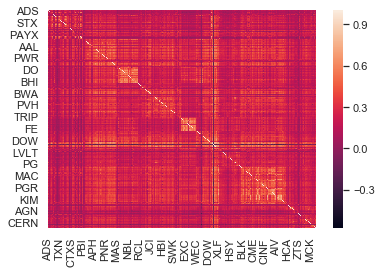

In [14]:
df3_corr = df3.corr()
sns.heatmap(df3_corr)

## 1.8 Exploring Two or more variables
Essential concepts:
Contingency tables, Hexagonal bining, Contour plots, Violin plots

In [21]:
df4=pd.read_csv("./data/kc_tax.csv")
df4.head(10)
df4_hex=df4[(df4['SqFtTotLiving']>100) & (df4['SqFtTotLiving']<3500)& (df4['TaxAssessedValue']<750000)]
df4_hex

,TaxAssessedValue,SqFtTotLiving,ZipCode
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0
5,223000.0,1570,98032.0
...,...,...,...
498244,375000.0,2230,98056.0
498245,316000.0,1710,98056.0
498246,340000.0,1930,98056.0
498247,132000.0,2930,98056.0


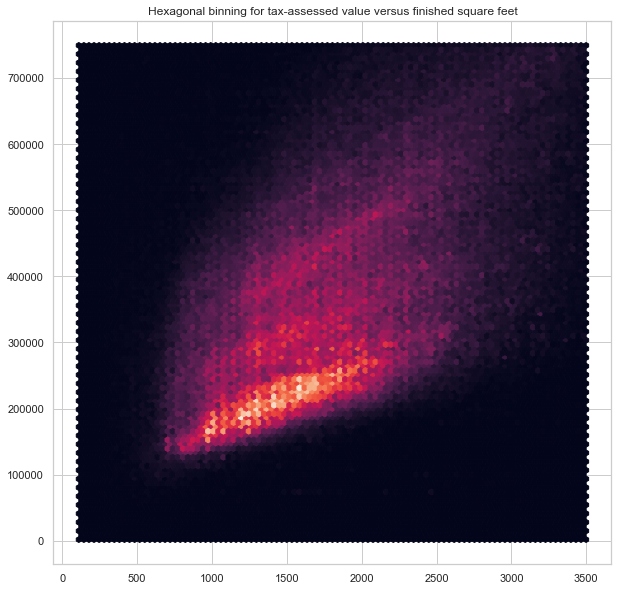

In [23]:
plt.figure(figsize=(10,10))
plt.hexbin(x=df4_hex['SqFtTotLiving'],y=df4_hex['TaxAssessedValue'])
plt.title("Hexagonal binning for tax-assessed value versus finished square feet")
plt.show()

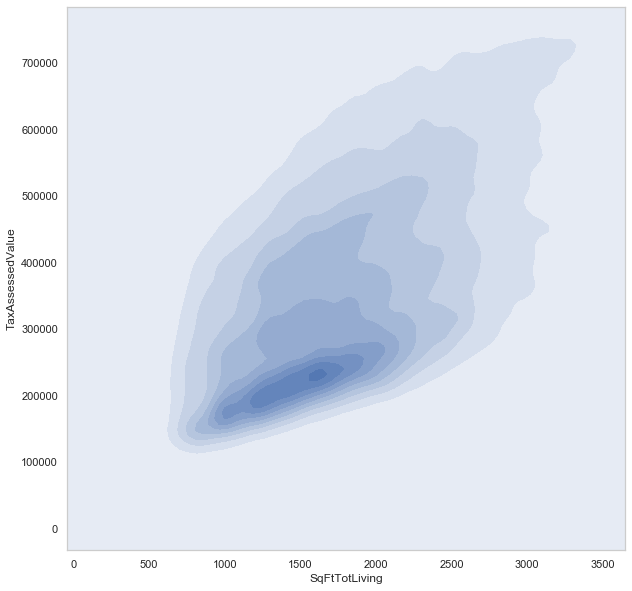

In [29]:
plt.figure(figsize=(10,10))
sns.kdeplot(df4_hex['SqFtTotLiving'],df4_hex['TaxAssessedValue'],shade=True)
plt.show()